In [3]:
import numpy as np
import pandas as pd

from typing import List, Tuple
import matplotlib.pyplot as plt
import math

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Fix the random seed for reproducibility
# !! Important !! : do not change this
# hw1_seed = 1234
# np.random.seed(hw1_seed)  
# pd.options.mode.chained_assignment = None 

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 

## testing splits ##

## 20 percent set aside
X_temp, X_te, y_temp, y_te = train_test_split(X, y, 
                                    test_size=0.20, random_state=1234, shuffle=True)

## that 75/25 split for the end 
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, 
                                    test_size=0.25, random_state=1234, shuffle=True)


X_tr


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
48004,AfricanAmerican,Female,[60-70),[75-100),1,1,7,2,MC,InternalMedicine,...,No,No,Steady,No,No,No,No,No,Ch,Yes
66310,Caucasian,Male,[70-80),[75-100),1,1,7,4,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,No,Yes
60905,Caucasian,Female,[70-80),[75-100),1,1,7,3,HM,InternalMedicine,...,No,No,Steady,No,No,No,No,No,Ch,Yes
1873,Caucasian,Female,[70-80),[75-100),3,1,1,2,MC,Surgery-General,...,No,No,No,No,No,No,No,No,No,No
38252,Caucasian,Female,[50-60),[75-100),1,6,7,3,MD,InternalMedicine,...,No,No,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56803,AfricanAmerican,Male,[20-30),[75-100),1,1,7,11,DM,InternalMedicine,...,No,No,Down,No,No,No,No,No,Ch,Yes
60682,Caucasian,Male,[70-80),[75-100),1,6,1,7,MC,Emergency/Trauma,...,No,No,Down,No,No,No,No,No,Ch,Yes
4596,Caucasian,Female,[70-80),[75-100),1,3,7,4,MC,Orthopedics,...,No,No,No,No,No,No,No,No,No,Yes
19756,AfricanAmerican,Male,[40-50),[75-100),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,No,Yes


In [7]:
#rebecca 

1


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


10


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


50


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


100


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


500


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1000


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


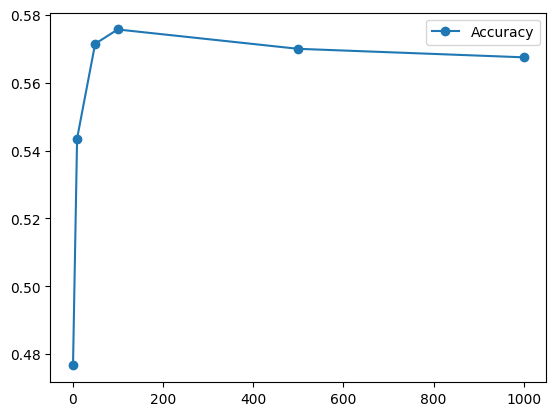

In [ ]:
#amy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#3 order ; one hot encoding <- splits categorical into more features 1/0 if yes/no and Standard scaler for scaling data


# replacing ? with NAN and replacing NAN with the mode
X = X.replace("?", np.nan)
y = y.replace("?", np.nan)

for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])


categorical = X_tr.select_dtypes(include=['object']).columns.tolist()
numerical = X_tr.select_dtypes(include=['int64']).columns.tolist()

encoder = OneHotEncoder(handle_unknown='ignore')
# X_tr_cat = encoder.fit_transform(X_tr[categorical])
# X_val_cat = encoder.fit_transform(X_val[categorical])
# X_te_cat = encoder.fit_transform(X_te[categorical])

scaler = StandardScaler()
# X_tr_num = encoder.fit_transform(X_tr[categorical])
# X_val_num = encoder.fit_transform(X_val[categorical])
# X_te_num = encoder.fit_transform(X_te[categorical])

##### COL TRANSFORMER NUM AND CAT COLUMNS <- joins them tgt and applies scaler and encoder
preproc = ColumnTransformer(transformers = [('num', scaler, numerical), ('cat', encoder, categorical)])
X_tr_2 = preproc.fit_transform(X_tr)
X_val_2 = preproc.transform(X_val)
X_te_2 = preproc.transform(X_te)


accs = []
# errs = []
k_vals = [1, 10, 50, 100, 500, 1000] ## 1-50 = 7.5 mins, 1-1000+ = 11.5 mins
for i, k in enumerate(k_vals):
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_tr_2, y_tr)
    pred = knn.predict(X_val_2)
    acc = accuracy_score(y_val, pred)

    accs.append(acc)
    # errs.append(1-acc)
## TODO: some of that ravel error stuff ? doesnt matter long run tho
plt.plot(k_vals, accs, marker='o', label='Accuracy')
plt.legend()
plt.show()

In [4]:
#varsh